In [1]:
"""
Created on Sun Feb 24 14:38:08 2019
@author: vman
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']}, size=14)
rc('text', usetex=False)
def plotModel():
    # build model variables for plot
    card1 = np.arange(1,11,1)
    numOtherCards = len(np.unique(card1))-1
    ## Before first card is shown
    # P0 = E[P1], reward prediction 1: expected  value of P1, the expected outcome conditional on card 1
    P0 = np.zeros(len(card1)) # Mean between winning and losing  outcomes    
    # Risk prediction for card 1 = E[(P1-P0)**2]: expected prediction error (squared) after card 1
    P1_risk = np.array([(1/5)*((1/9)**2 + (3/9)**2 + (5/9)**2 + (7/9)**2 + 1) for t in np.arange(len(card1))])
    # Another definition, but needs P1_rpe to be defined already    
    ## After first card is shown
    # Compute number of winning cards given guess
    numCardsWin = np.array([len(np.where(np.unique(card1) < card1[i])[0]) for i in np.arange(len(card1))])
    # P1 = E[P2 | card1], reward prediction 2: expected value of P2, the actual reward after card 2 is presented    
    P1 = np.array([(numCardsWin[i] - (numOtherCards-numCardsWin[i]))/numOtherCards for i in np.arange(len(card1))])
    # Compute the prediction error for reward prediction 1
    P1_rpe = P1-P0
    # Compute observed risk
    P1_obsvRisk = (P1_rpe)**2
    # Compute the risk prediction error
    P1_riskPE = P1_obsvRisk - P1_risk
    # Risk prediction for card 2 = E{(P2-P1)**2}
    P2_risk = np.array([(numCardsWin[i]/numOtherCards) * (1 - P1[i])**2 + ((numOtherCards-numCardsWin[i])/numOtherCards) * (-1 - P1[i])**2 for i in np.arange(len(card1))])
    # Compute win/loss variables for plots
    P2_rpe_lose = np.repeat(-1,len(card1)) - P1
    P2_rpe_win = np.repeat(1,len(card1)) - P1
    P2_obsvRisk_lose = (P2_rpe_lose)**2
    P2_obsvRisk_win = (P2_rpe_win)**2
    P2_riskPE_lose = P2_obsvRisk_lose - P2_risk
    P2_riskPE_win = P2_obsvRisk_win - P2_risk
    # No prediction error if p(win) = 1 or 0, will defs guess correctly
    P2_rpe_lose[-1] = np.nan  
    P2_rpe_win[0] = np.nan 
    P2_riskPE_lose[-1] = np.nan
    P2_riskPE_win[0] = np.nan 
    #### Mean centering ####
    # Card 1 vars
    P1_risk -= np.nanmean(P1_risk)
    P1 -= np.nanmean(P1)
    P1_rpe -= np.nanmean(P1_rpe)
    P1_obsvRisk -= np.nanmean(P1_obsvRisk)
    P1_riskPE -= np.nanmean(P1_riskPE)
    P2_risk -= np.nanmean(P2_risk)
    # Card 2 vars
    P2_rpe_mean = np.nanmean([P2_rpe_win,P2_rpe_lose])
    P2_rpe_win -= P2_rpe_mean
    P2_rpe_lose -= P2_rpe_mean
    P2_obsvRisk_mean =  np.nanmean([P2_obsvRisk_win, P2_obsvRisk_lose])
    P2_obsvRisk_lose -= P2_obsvRisk_mean
    P2_obsvRisk_win -= P2_obsvRisk_mean
    P2_riskPE_mean = np.nanmean([P2_riskPE_win, P2_riskPE_lose])
    P2_riskPE_win -= P2_riskPE_mean
    P2_riskPE_lose -= P2_riskPE_mean
    #### Plottting #### 
    fig, ax = plt.subplots(2,4, sharex=False, sharey=True, figsize=(12,5))   
    # Expected risk before card 1 (constant)
    ax[0,0].plot(card1, P0, color="green", linewidth=3, linestyle='-', label='P0')
    ax[0,0].legend(shadow=False, fontsize=10)                 
    ax[0,0].set_xticks([])
    # E.V before card 1 (constant)     
    ax[1,0].plot(card1, P1_risk, color="gold", linewidth=3, linestyle='-',label=r"$E.Risk_{c1}$")
    ax[1,0].legend(shadow=False, fontsize=10)
    ax[1,0].set_xlabel('Before Card 1')
    ax[1,0].set_ylabel('Model Prediction')
    ax[1,0].set_xticks([])
    # Expected value and uncertainty at C1
    ax[0,1].plot(card1, P1, color="green", linewidth=3, label='EV')
    ax[0,1].legend(shadow=False, fontsize=10)    
    ax[0,1].set_xticks([])
    ax[1,1].plot(card1, P1_riskPE, color="red", linewidth=3, label=r"$RiPE_{c1}$")
    ax[1,1].legend(shadow=False, fontsize=10)
    ax[1,1].set_xlabel('At Card 1 Onset')
    # E.risk before C1 
    ax[1,2].plot(card1, P2_risk, color="gold", linewidth=3,label=r"$E.Risk_{c2}$")
    ax[1,2].legend(shadow=False, loc='upper right', fontsize=10)
    ax[1,2].set_xlabel('At Card 1 Offset')
    # RPE at C2        
    ax[0,3].plot(card1, P2_rpe_win, color="blue", linewidth=3,  label=r"$RePE_{c2}$ | win")
    ax[0,3].plot(card1, P2_rpe_lose, color="blue",  linestyle='--', linewidth=3,  label=r"$RePE_{c2}$ | loss" )    
    ax[0,3].legend(shadow=False, fontsize=10)
    ax[0,3].set_xticks([])
    ax[1,3].plot(card1, P2_riskPE_win, color="red", linewidth=3, label=r"$RiPE_{c2}$ | win")
    ax[1,3].plot(card1, P2_riskPE_lose, color="red", linestyle='--', linewidth=3, label=r"$RiPE_{c2}$ | loss")
    ax[1,3].set_xlabel('At Card 2')
    ax[1,3].legend(shadow=False, fontsize=10)
    return(fig)

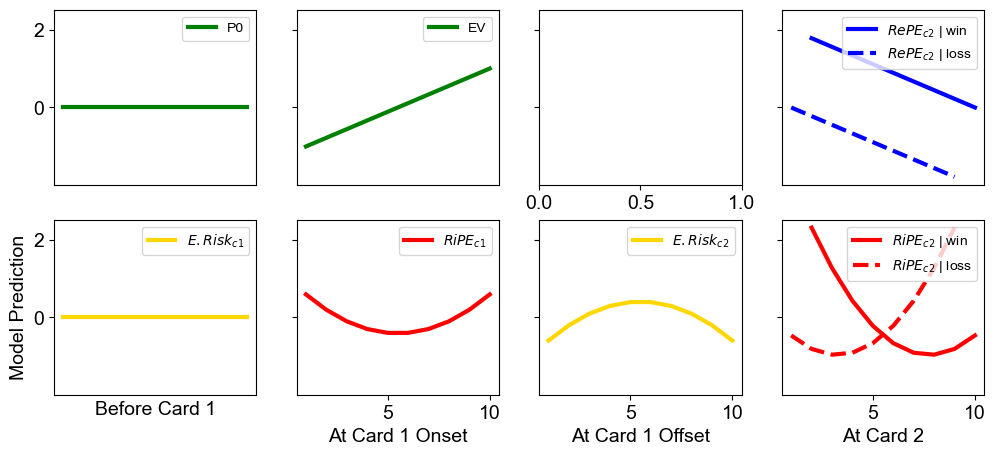

In [2]:
fig = plotModel()